# DX 602 Final Project

## Introduction

In this project, you will practice the skills that you have learned throughout this module with a heavy focus on building models.
Most of the problems and questions are open ended compared to your previous homeworks, and you will be asked to explain your choices.
Most of them will have a particular type of solution implied, but it is up to you to figure out the details based on what you have learned in this module.

## Instructions

Each problem asks you to perform build models, run a computation, or otherwise perform some analysis of the data, and usually answer some questions about the results.
Make sure that your question answers are well supported by your analysis and explanations; simply stating an answer without support will earn minimal points.

Notebook cells for code and text have been added for your convenience, but feel free to add additional cells.

## Example Code

You may find it helpful to refer to this GitHub repository of Jupyter notebooks for example code.

* https://github.com/bu-cds-omds/dx601-examples
* https://github.com/bu-cds-omds/dx602-examples

Any calculations demonstrated in code examples or videos may be found in these notebooks, and you are allowed to copy this example code in your homework answers.

## Submission

This project will be entirely manually graded.
However, we may rerun some or all of your code to confirm that it works as described.

### Late Policy

The normal homework late policy for OMDS does not apply to this project.
Boston University requires final grades to be submitted within 72 hours of class instruction ending, so we cannot accommodate 5 days of late submissions.

However, we have delayed the due date of this project to be substantially later than necessary given its scope, and given you more days for submission with full credit than you would have had days for submission with partial credit under the homework late policy.
The Thanksgiving holiday was also taken into account in setting the deadline.
Finally, the deadlines for DX 601 and DX 602 were coordinated to be a week apart while giving ample time for both of their projects.

## Shared Imports

For this project, you are forbidden to use modules that were not loaded in this template.
While other modules are handy in practice, modules that trivialize these problems interfere with our assessment of your own knowledge and skills.

If you believe a module covered in the course material (not live sessions) is missing, please check with your learning facilitator.

In [1]:
import math
import sys

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats
import sklearn.linear_model

## Problems

### Problem 1 (5 points)

Pick one of the following data sets to analyze in this project.
Load the data set, and show a random sample of 10 rows.

* [Wine Quality](https://archive.ics.uci.edu/dataset/186/wine+quality) ([PMLB - red subset only](https://github.com/EpistasisLab/pmlb/tree/master/datasets/wine_quality_red))
* [Body Fat](https://www.openml.org/search?type=data&status=active&id=560) ([PMLB](https://github.com/EpistasisLab/pmlb/tree/master/datasets/560_bodyfat))

The PMLB copies of the data are generally cleaner and recommended for this project, but the other links are provided to give you more context.
To load the data from the PMLB Github repository, navigate to the `.tsv.gz` file in GitHub and copy the link from the "Raw" button.

If the dataset has missing data, you should drop the rows with missing data before proceeding.
If the data set you choose has more than ten columns, you may limit later analysis that is requested per column to just the first ten columns.

In [3]:
# YOUR CODE HERE

url_link = "https://github.com/EpistasisLab/pmlb/raw/refs/heads/master/datasets/wine_quality_red/wine_quality_red.tsv.gz"

wine_df = pd.read_csv(url_link, sep = "\t")

wine_df = wine_df.dropna()

wine_df_sample = wine_df.sample(10, random_state = 18)
wine_df_sample

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,target
1363,8.0,0.830,0.27,2.0,0.080,11.0,63.0,0.99652,3.29,0.48,9.8,4
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
739,9.0,0.690,0.00,2.4,0.088,19.0,38.0,0.99900,3.35,0.60,9.3,5
1366,7.3,0.740,0.08,1.7,0.094,10.0,45.0,0.99576,3.24,0.50,9.8,5
901,7.4,0.635,0.10,2.4,0.080,16.0,33.0,0.99736,3.58,0.69,10.8,7
330,10.2,0.360,0.64,2.9,0.122,10.0,41.0,0.99800,3.23,0.66,12.5,6
839,6.0,0.500,0.04,2.2,0.092,13.0,26.0,0.99647,3.46,0.47,10.0,5
246,7.1,0.680,0.07,1.9,0.075,16.0,51.0,0.99685,3.38,0.52,9.5,5
1097,8.6,0.520,0.38,1.5,0.096,5.0,18.0,0.99666,3.20,0.52,9.4,5
506,10.4,0.240,0.46,1.8,0.075,6.0,21.0,0.99760,3.25,1.02,10.8,7


YOUR ANSWERS HERE

### Problem 2 (10 points)

List all of the columns and describe them in your own words.

In [4]:
# Dataset Columns and Description

print(wine_df.columns)
wine_df.describe()

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'target'],
      dtype='object')


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,target
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


#### <ins>**Columns Description**</ins>

##### **1) <ins>Fixed Acidity**</ins> = It is the amount of non-volatile acids (mainly tartaric acid) present in the wine. These acids are responsible for the wine to taste sharp, tart and don't evaporate easily. Higher values of fixed acidity implies more acidic wine.

##### **2) <ins>Volatile Acidity**</ins> = The amount of acetic acids and other acids that can evaporate. High values of these cause the wine to have an unpleasant vinegar like taste and smell. Prefarable to have lesser values.

##### **3) <ins>Citric Acid**</ins> = This is a weak acid that gives the wine a citric flavor and brings freshness. Sometimes winemakers add citric acid to wines to brighten them.

##### **4) <ins>Residual Sugar**</ins> = Residual sugar is the amount of sugar left in the wine after the process of fermentation stops. Usually it is very low in dry wines like red wine. Higher values would indicate a sweeter wine.

##### **5) <ins>Chlorides**</ins> = This indicates the salt content (Sodium Chloride and others) present in the wine. Too much chlorides makes the wine taste salty or harsh.

##### **6) <ins>Free sulphur dioxide**</ins> = It is the amounnt of SO2 not bound to other molecules. It protects the wine from spoilage and oxidation as it acts like a preservative and antioxidant.

##### **7) <ins>Total sulphur dioxide**</ins> = Total sulphur dioxide present in the wine, including the free and bound forms. High amounts can cause a chemical smell and it is regulated as people are sensitive to it.

##### **8) <ins>Density**</ins> = How thick/dense the wine is compared to water. It is influenced by alcohol and sugar content, higher sugar or lower alcohol increases the density.

##### **9) <ins>pH**</ins> = This value measures how acidic or basic the wine is on a standard scale of 0 to 14. Lower the pH, more acidic is the wine. Typical red wines have a pH between 3 and 4.

##### **10) <ins>Sulphates**</ins> = This refers to the potassium sulphate or other sulphate compounds added by the winemakers. They are useful in preservation and enhancing the flavor.

##### **11) <ins>Alcohol**</ins> = The percentage of alcohol in wine by volume (% ABV). Higher alcohol percentages gives a warmer mouthfeel and can give a perception of sweetness.

##### **12) <ins>Target (Quality)**</ins> = A score given most probably by wine experts on a scale of 0 to 10. In this red wine dataset, the wines are rated between 3 and 8. Higher scores means better overall quality of the wine. This is the feature we will try to predict.

### Problem 3 (50 points)

Perform an exploratory analysis of the data set.
After your exploratory analysis, pick 3 individual charts that you the think were particularly interesting.
Repeat those charts separately from your original analysis, and after each of those charts, explain what you thought was noteworthy.

In [ ]:
# Structure of Dataset

print("The shape of the dataset :", wine_df.shape)
print("The columns in the dataset :", wine_df.columns.tolist())
print("The datatypes of the columns:")
print(wine_df.dtypes)

The shape of the dataset : (1599, 12)
The columns in the dataset : ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'target']
The datatypes of the columns:
fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
target                    int64
dtype: object


##### The red wine dataset has 1599 rows and 12 columns. All the input columns have a datatype of float64 and output variable is int64.

In [21]:
# Checking for Missing Data

print("Missing values per column :")
print(wine_df.isnull().sum())
print("\nTotal missing values in the dataset :", wine_df.isnull().sum().sum())

Missing values per column :
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
target                  0
dtype: int64

Total missing values in the dataset : 0


##### There is no missing data in the red wine dataset.

In [22]:
# Dataset Summary Statistics

wine_df.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


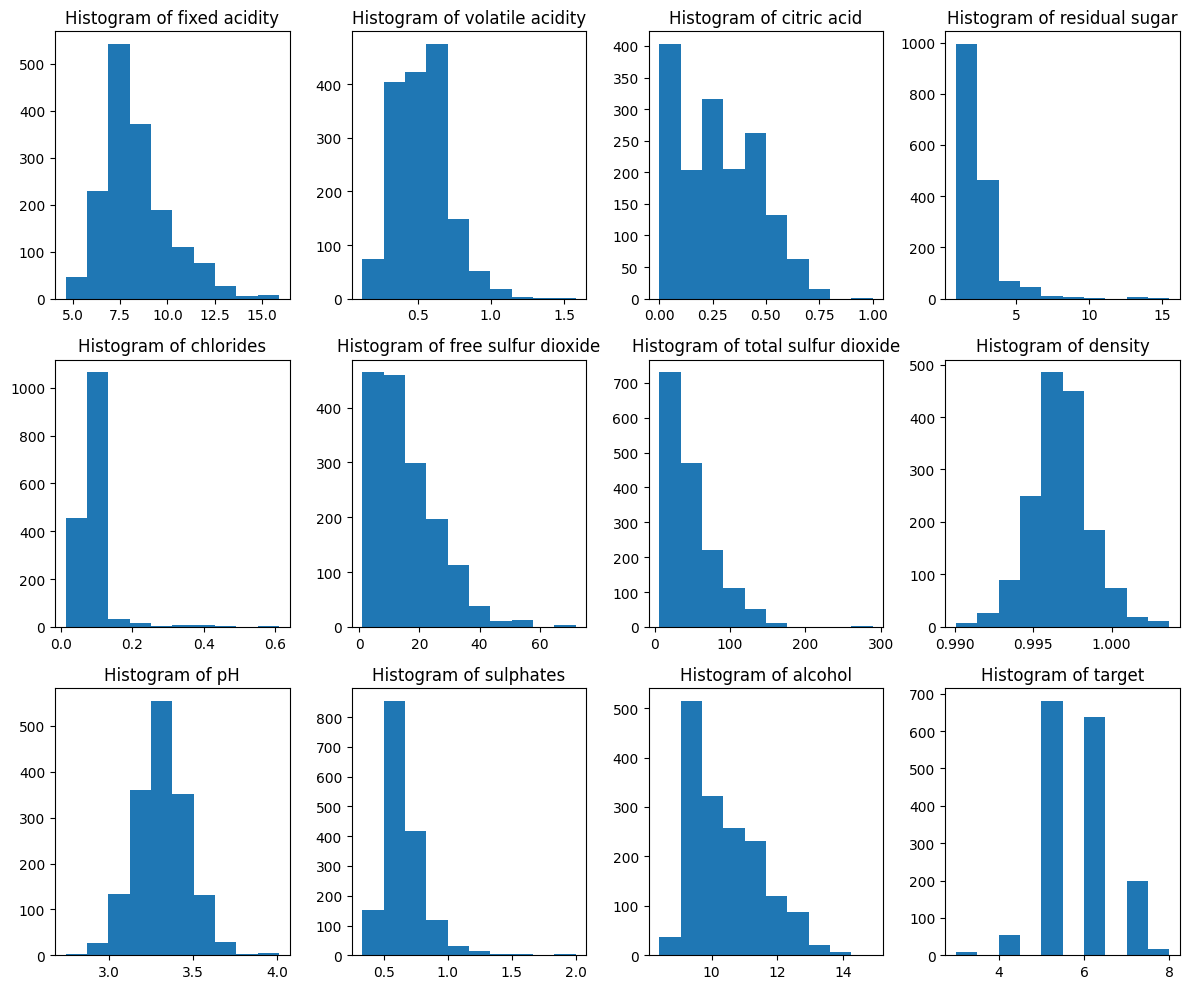

In [25]:
# Histograms for every column

plt.figure(figsize = (12,10))
for i, col in enumerate(wine_df.columns,1):
    plt.subplot(3,4,i)
    plt.hist(wine_df[col])
    plt.title(f"Histogram of {col}")

plt.tight_layout()
plt.show()

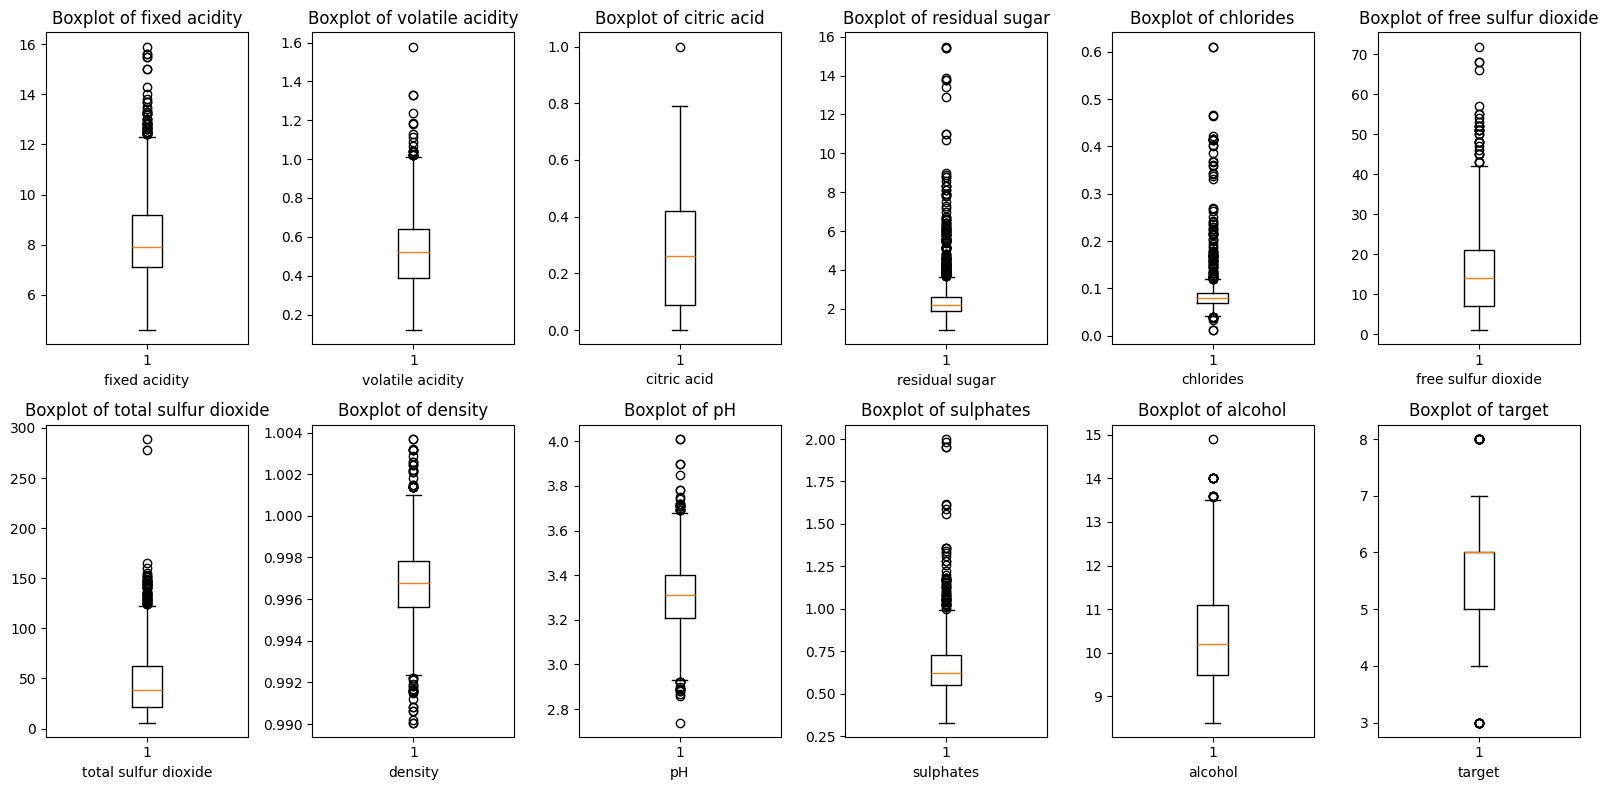

In [34]:
# Check for outliers using boxplots

plt.figure(figsize = (16,8))
for i, col in enumerate(wine_df.columns,1):
    plt.subplot(2,6,i)
    plt.boxplot(wine_df[col])
    plt.title(f"Boxplot of {col}")
    plt.xlabel(col)

plt.tight_layout()
plt.show()

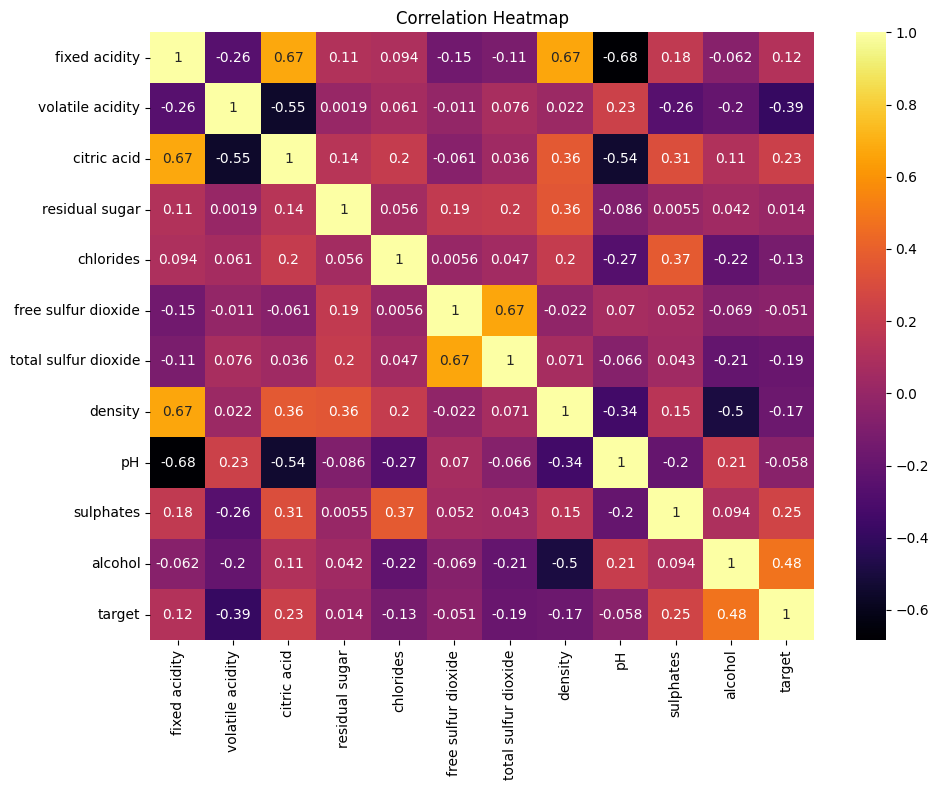

In [28]:
# Correlation Heatmap
import seaborn as sns

corr = wine_df.corr(numeric_only = True)

plt.figure(figsize = (10,8))
sns.heatmap(corr, annot = True, cmap = "inferno")
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

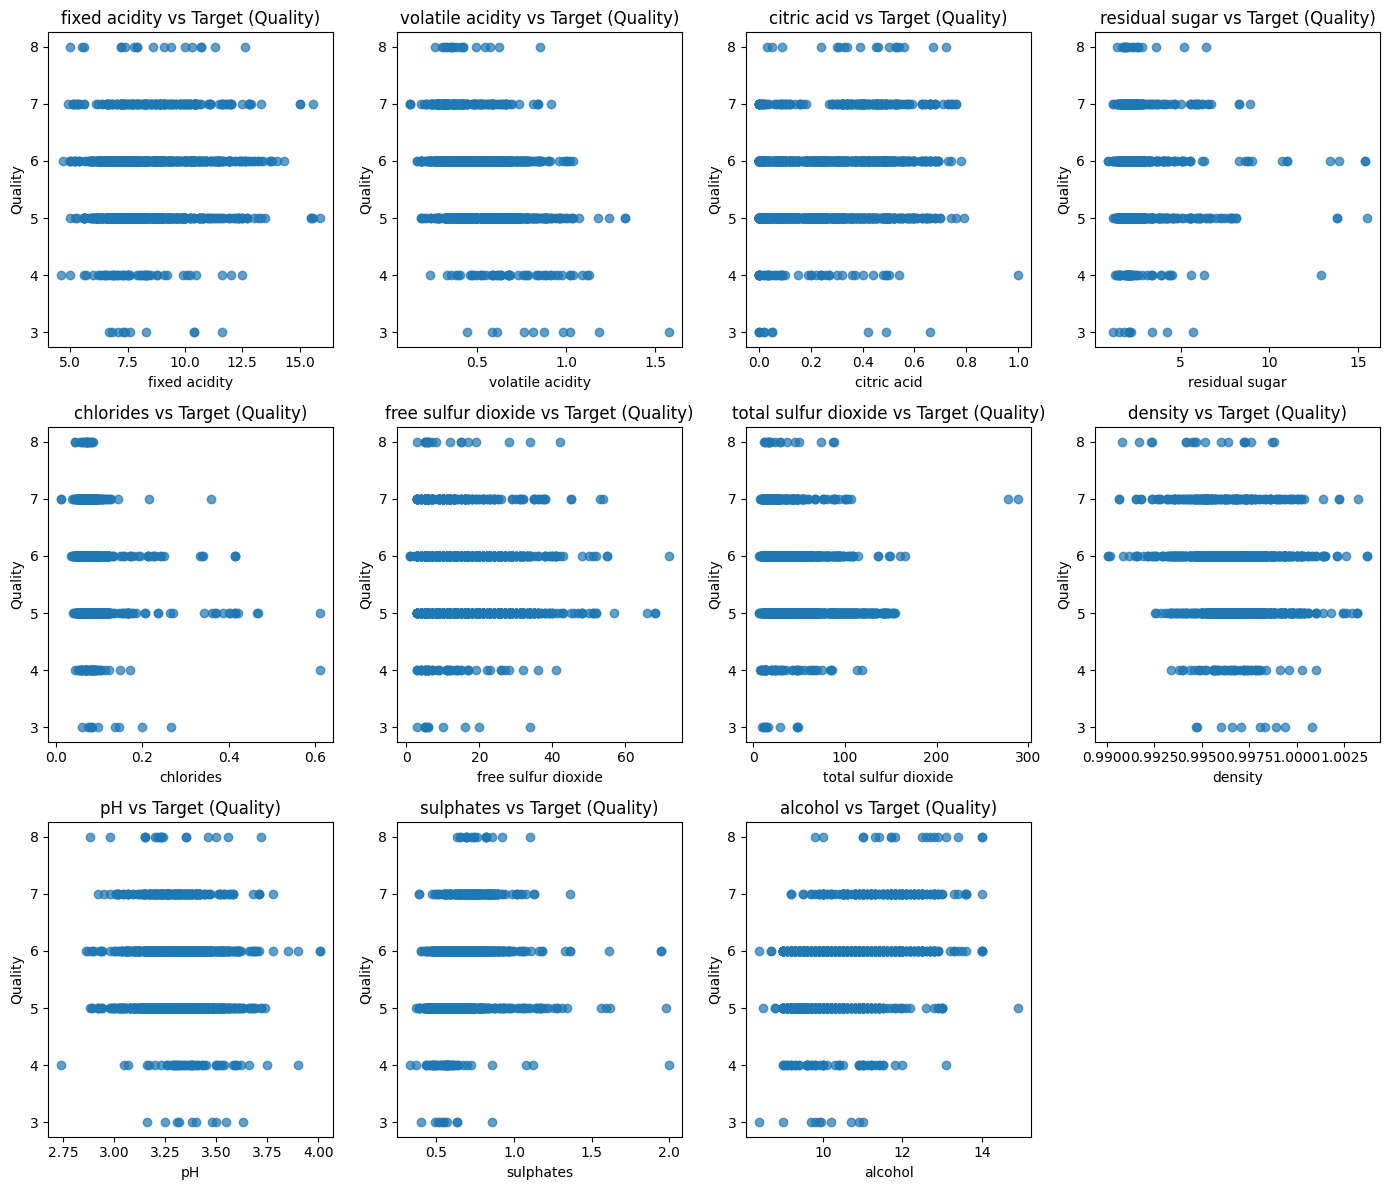

In [40]:
# Input Columns vs Target (Quality)

plt.figure(figsize = (14,12))
for i, col in enumerate(wine_df.columns[:-1],1):
    plt.subplot(3,4,i)
    plt.scatter(wine_df[col], wine_df["target"], alpha = 0.7)
    plt.title(f"{col} vs Target (Quality)")
    plt.xlabel(col)
    plt.ylabel("Quality")
plt.tight_layout()
plt.show()

YOUR ANSWERS HERE

### Problem 4 (5 points)

Plot the correlation matrix of the numeric columns in the data set.
Which pair of different columns were highlighted as the most correlated?

In [ ]:
# YOUR CODE HERE

YOUR ANSWERS HERE

### Problem 5 (10 points)

Pick three different regression model classes to try in problem 6 from the scikit-learn documentation.
For each class, provide a link to the scikit-learn documentation, and a link to another web page describing how that kind of model works.
The second link should not be from scikit-learn, but Wikipedia is acceptable.
You do not need to understand the methods at this time, but it is good to be comfortable researching them.

In [ ]:
# YOUR CODE HERE

YOUR ANSWERS HERE

### Problem 6 (50 points)

Build three different regression models using the entire data set.
Plot the actual target vs the predicted values for each in one chart.
Compute the L2 and L1 losses for each of them.
You may use any regression class provided provided by scikit-learn, and you may reuse one class as long as you change its parameters enough to see different results.

In [ ]:
# YOUR CODE HERE

YOUR ANSWERS HERE

### Problem 7 (30 points)

Use 5-fold cross-validation to repeat building the same three kinds of regression models. Compare the L2 losses predicted by cross-validation against the L2 losses training against the whole data set. (The difference is likely from overfitting in the latter.)

In [ ]:
# YOUR CODE HERE

YOUR ANSWERS HERE

### Problem 8 (25 points)

Build three different regression models as in problem 6, but preprocess the data so that each column has mean zero and standard deviation one first.
For full credit, use a scikit-learn pipeline for each model.
For each model, compare the L2 losses -- which of them performed differently from your results in problem 6?

(This process will be covered in week 13.)

In [ ]:
# YOUR CODE HERE

YOUR ANSWERS HERE

### Problem 9 (5 points)

A colleague suggests that you find better models by repeatedly building decision trees with random depth limits.
They say that trying 1000 such models will likely find an improvement as long as you use cross validation.
Give a one sentence response to this suggestion. 

In [ ]:
# YOUR CODE HERE

YOUR ANSWERS HERE

### Problem 10 (10 points)

Pick a best model from all the models that you built and otherwise described in this project.
Explain how you picked it, including what criteria you chose, and how the other models compared by that criteria.
As much as possible, justify that problem in the context of the original data set. 

In [ ]:
# YOUR CODE HERE

YOUR ANSWERS HERE